# Лабораторная работа №3

ФИО:  **Петрова Арина Романовна**

Группа: **БИВТ-20-2**

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadlines**:
- soft -- **16.04.2023 23:59** (за сдачу в пределах этого времени +1 балл в табличку)
- hard -- **30.04.2023 23:59**


**Что необходимо сделать**:
1. Заполнить все ячейки ниже кодом так, чтобы прошли все `assert`ы.
2. **Побороть качество моей модели** (в конце ноутбука)


**P.S. Используйте части кода с прошлой лабы для forward pass**

Сначала импортируем нужные библиотеки  
Если чего-то нет локально, можно установить через pip install

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from accessify import protected

# Задача 1. Реализовать слой с функцией активации "сигмоида"

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)

Формула сигмоиды:
$$
f(x) = \frac {1}{1 + e^{-x}}
$$

In [2]:
class SigmoidLayer():
    def __init__(self):
        """
        На будущее необходимо сохранить параметры и gradInput 
        """
        self.params = []
        self.gradW = None
        self.gradInput = None
    
    @protected
    def calculate_sigmoid(self):
        return 1 / (1 + np.exp(-self.X))

    def forward(self, X):
        """
        Реализовать forward pass
        P.S. не забудьте сохранить X во внутреннюю переменную
        """
        self.X = X.copy()
        return self.calculate_sigmoid()
    
    def backward(self, dout):
        """
        Реализовать bacward pass
        
        Необходимо возвращать градиенты в виде:
        return self.gradInput, [self.gradW, self.gradB]
        
        P.S. если нет gradW и/или gradB, то возвращать пустой лист [], 
        вот так
        return self.gradInput, []
        """
        sigmoid_value = self.calculate_sigmoid()
        self.gradInput = dout * sigmoid_value * (1 - sigmoid_value)
        return self.gradInput, []

In [3]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
sigmoid = SigmoidLayer()
output = sigmoid.forward(X)
correct_answer = np.array([[0.57313782, 0.62961995, 0.54773438],
                           [0.51696857, 0.68718368, 0.65843628],
                           [0.65419284, 0.64005501, 0.50976449],
                           [0.58851107, 0.7202462 , 0.51500666],
                           [0.70350447, 0.70626044, 0.51279562]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(sigmoid, "params"), "Нет параметра params в реализованном классе"
assert hasattr(sigmoid, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(sigmoid, "X"), "Не сохранили X в реализованном классе"


dout = np.random.random(size=(100, 3))
dInput, _ = sigmoid.backward(dout)
correct_dInput = np.array([[0.19460589, 0.20407074, 0.17488009],
                           [0.1656316 , 0.10298473, 0.08073351],
                           [0.21590141, 0.1403435 , 0.21416212],
                           [0.21320927, 0.03610846, 0.05416308],
                           [0.00737656, 0.03121984, 0.02882668]])
assert np.isclose(dInput[:5], correct_dInput).all()

# Задача 2. Реализовать слой с активацией гиперболического тангенса

![](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-27_at_4.23.22_PM_dcuMBJl.png)

In [4]:
class TanhLayer():
    def __init__(self):
        """
        На будущее необходимо сохранить параметры и gradInput 
        """
        self.params = []
        self.gradInput = None
    
    @protected
    def calculate_tanh(self):
        return (np.exp(self.X) - np.exp(-self.X)) / (np.exp(self.X) + np.exp(-self.X))

    def forward(self, X):
        """
        Реализовать forward pass
        P.S. не забудьте сохранить X во внутреннюю переменную
        """
        self.X = X.copy()
        return self.calculate_tanh()
    
    def backward(self, dout):
        """
        Реализовать bacward pass
        
        Необходимо возвращать градиенты в виде:
        return self.gradInput, [self.gradW, self.gradB]
        
        P.S. если нет gradW и/или gradB, то возвращать пустой лист [], 
        вот так
        return self.gradInput, []
        """
        tanh_value = self.calculate_tanh()
        self.gradInput = dout * (1 - tanh_value**2)
        return self.gradInput, []

In [5]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
tanh = TanhLayer()
output = tanh.forward(X)
correct_answer = np.array([[0.28642281, 0.48582948, 0.18921297],
                           [0.0677962 , 0.65669792, 0.57591821],
                           [0.5632092 , 0.51946218, 0.03904306],
                           [0.34328675, 0.73782249, 0.05997262],
                           [0.69833441, 0.70505935, 0.05114899]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(tanh, "params"), "Нет параметра params в реализованном классе"
assert hasattr(tanh, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(tanh, "X"), "Не сохранили X в реализованном классе"


dout = np.random.random(size=(100, 3))
dInput, _ = tanh.backward(dout)
correct_dInput = np.array([[0.7301867 , 0.66854527, 0.68068037],
                           [0.66024164, 0.27247731, 0.23991181],
                           [0.65163784, 0.44479135, 0.85566899],
                           [0.77667226, 0.08164937, 0.21606773],
                           [0.01811832, 0.07567937, 0.11508041]])
assert np.isclose(dInput[:5], correct_dInput).all()

# Задача 3. Реализовать функцию потерь MSE

В качестве интерактива-микрозадания, поищите формулу MSE в гугле 😊

In [6]:
class MSELoss():
    def forward(self, y_true, y_pred):
        """
        Реализовать forward pass
        """
        return (1 / len(y_true)) * np.sum((y_true - y_pred)**2)
    
    def backward(self, y_true, y_pred):
        return -2 * (y_true - y_pred) / len(y_true)

In [7]:
np.random.seed(17)

y_true = np.random.randint(0, 1000, size=(100))
y_pred = np.random.randint(0, 1000, size=(100))
mse = MSELoss()
output = mse.forward(y_true, y_pred)
correct_answer = 157953.51
assert round(output) == round(correct_answer)

dout = mse.backward(y_true, y_pred)
right_dout = np.array([3.56, 1.24, 10.2, 7.68, 3.02, 9.04, -12.84, -2.16, 3.04, 0.24])
assert np.isclose(dout[:10], right_dout).all()
assert round(dout.sum(), 3) == 19.26

# Задача 4. Реализовать каркас нейросети

In [8]:
class LinearLayer:
    """
    Линейный слой с семинаров, ничего менять не надо
    """
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size)
        self.params = [self.W]
        self.gradW = None
        self.gradInput = None

    def forward(self, X):
        self.X = X.copy()
        output = X.dot(self.W)
        return output
    
    def backward(self, dout):
        self.gradW = self.X.T.dot(dout)
        self.gradInput = dout.dot(self.W.T)
        return self.gradInput, [self.gradW]


class NN:
    def __init__(self, loss_func, X_train=None, y_train=None, X_test=None, y_test=None):
        """
        Необходимо, чтобы нейросеть знала все о своей конфигурации.
        1. Создайте внутренние переменные layers, params и grads как пустые листы.
        2. Во внутреннюю переменную loss_func положите значение полученной переменной loss_func.
        """
        self.layers = []
        self.params = []
        self.grads = []
        self.loss_func = loss_func
        
        self.X_train, self.y_train = X_train, y_train
        self.X_test, self.y_test = X_test, y_test

        self.mae_train, self.mae_test= None, None
        self.me_train, self.me_test= None, None
        self.mape_train, self.mape_test= None, None 

    def add_layer(self, layer):
        """
        Функция добавления слоев в нейросеть.
        Необходимо, чтобы обновлялись (расширялись) внутренние переменные,
        ответственные за слои и параметры этих самых слоев, которые мы инициализировали
        в __init__ методе.
        """
        self.layers.append(layer)
        self.params.append(layer.params)
        
    def add_layers(self, shapes, activations, linear_layers):
        for shape, Activation, _LinearLayer in zip(shapes, activations, linear_layers):
            self.add_layer(_LinearLayer(shape[0], shape[1]))
            if Activation:
                self.add_layer(Activation())

    def forward(self, X):
        """
        Реализовать forward pass для всей нейросети.
        Т.е. реализовать forward pass по каждому слою, и в конце выдать результат 
        """
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, dout):
        """
        Реализовать backward pass для всей нейросети.
        Т.е. реализовать backward pass по каждому слою в обратном порядке
        Каждый слой возвращает dout (проталкиваем градиент далее) 
        и grad (градиенты параметров для их обновления)
        Все полученные градиенты параметров необходимо добавить во внутреннюю 
        переменную self.grads
        В конце необходимо вернуть self.grads
        В начале необходимо обнулять градиенты
        """
        self.clear_grad_param()
        for layer in reversed(self.layers):
            dout, grads = layer.backward(dout)
            self.grads.append(grads)
        return self.grads

    def train_step(self, X, y):
        """
        Функция для проведения одного шага тренировки модели
        
        Что необходимо сделать:
        1. Пропустить полученные данные через сеть
        2. Получить значение loss функции
        3. Получить градиенты loss функции
        4. Полученные от loss функции градиенты запустить в сеть назад
        
        Возвращаем значение лосс функции из пункта 2 и градиенты из пункта 4.
        """
        out = self.forward(X)
        loss = self.loss_func.forward(y, out)
        dout = self.loss_func.backward(y, out)
        grads = self.backward(dout)
        return loss, grads

    def predict(self, X):
        """
        Функция для предсказания при заданных Х.
        По большому счету, необходимо просто прогнать forward pass
        и вернуть полученные значения.
        """
        return self.forward(X)
    
    def dispGradParam():
        """
        Функция для принта градиентов, уже готовая
        """
        print(self.grads)
    
    def clear_grad_param(self):
        """
        Функция для очищения градиентов, уже готовая
        """
        self.grads = []
        
    def calculate_metrics(self):
        y_train_pred, y_test_pred = self.predict(X_train), self.predict(X_test)
        y_train_pred_true_values, y_test_pred_true_values = np.exp(y_train_pred), np.exp(y_test_pred)
        y_train_true_values, y_test_true_values = np.exp(y_train), np.exp(y_test)
        
        self.mae_train = np.mean(abs(y_train - y_train_pred))
        self.mae_test = np.mean(abs(y_test - y_test_pred))
        
        self.me_train = np.mean(abs(y_train_true_values - y_train_pred_true_values))
        self.me_test = np.mean(abs(y_test_true_values - y_test_pred_true_values))
        
        def mape_count(y_true, y_pred):
            return np.mean((abs(y_true - y_pred) / y_true) * 100)
        
        self.mape_train = mape_count(y_train_true_values, y_train_pred_true_values)
        self.mape_test = mape_count(y_test_true_values, y_test_pred_true_values)
        
    def print_mae(self):
        print(f"Средняя абсолютная ошибка на трейне: {self.mae_train:.3f}")
        print(f"Средняя абсолютная ошибка на тесте: {self.mae_test:.3f}")
        
    def print_me(self):
        print(f"Средняя ошибка на трейне: {self.me_train:.2f}")
        print(f"Средняя ошибка на тесте: {self.me_test:.2f}")
        
    def print_mape(self):
        print(f"MAPE train: {self.mape_train:.2f}%")
        print(f"MAPE test: {self.mape_test:.2f}%")
        
    def print_metrics(self):
        self.print_mae()
        print()
        self.print_me()
        print()
        self.print_mape()
    
    
nn = NN(MSELoss())

assert hasattr(nn, "layers")
assert hasattr(nn, "params")
assert hasattr(nn, "grads")
assert hasattr(nn, "loss_func")
assert isinstance(nn.loss_func, MSELoss)

In [9]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
nn = NN(MSELoss())

linear1 = LinearLayer(3, 5)
nn.add_layer(linear1)

sigmoid1 = SigmoidLayer()
nn.add_layer(sigmoid1)

linear2 = LinearLayer(5, 1)
nn.add_layer(linear2)

sigmoid2 = SigmoidLayer()
nn.add_layer(sigmoid2)

output_nn = nn.forward(X)

assert round(output_nn.sum()) == 65


y = np.random.randint(0, 2, size=100).reshape(-1, 1)

nn_predict = nn.predict(X)
assert (output_nn == nn.predict(X)).all()

loss, grads = nn.train_step(X, y)
right_loss = np.array([0.24705916])

assert np.isclose(loss, right_loss)
assert grads[0] == []
assert round(grads[1][0].sum(), 4) == 0.0394
assert grads[2] == []
assert round(grads[3][0].sum(), 4) == 0.0077

# Задача 4.1. Реализовать нарезку датасета на минибатчи

Минибатч -- это кусочек данных определенного размера, который мы можем варьировать сами  
Например, если в датасете 1000 записей, а мы хотим поставить размер батча в 50 наблюдений, то мы получим 20 батчей с 50 наблюдениями в каждом

In [10]:
def minibatch(X, y, minibatch_size):
    """
    Функция для нарезания X и у на куски размером minibatch_size.
    Возвращает данные в виде: [(X_batch1, y_batch1), 
                               (X_batch2, y_batch2), 
                               ...]
    """
    params = [(start, start + minibatch_size) for start in range(0, len(y), minibatch_size)]
    return [(X[start:end], y[start:end]) for start, end in params]

In [11]:
np.random.seed(17)

BATCH_SIZE = 33
X = np.random.random(size=(100, 3))
y = np.random.randint(0, 2, size=100).reshape(-1, 1)

minibatches = minibatch(X, y, BATCH_SIZE)
X_batch0, y_batch0 = minibatches[0]
correct_y_batch0 = np.array([[0], [0], [0], [1], [1]])
assert len(minibatches) == 4
assert round(X_batch0.sum(), 3) == 50.216
assert (y_batch0[:5] == correct_y_batch0).all()

In [12]:
def update(velocity, params, grads, learning_rate=0.001, mu=0.9):
    """
    Обратите внимание на эту функцию
    Здесь происходит чуть хитрое обновление весов
    На семинаре поговорим об этом
    """
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] + learning_rate * g[i]
            p[i] -= v[i]
            

def plot_train_process(train_acc_list, val_acc_list, 
                       mean_train_loss_list, mean_val_loss_list):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Mean absolute error')
    axes[1].set_title('Loss')
    
    axes[0].plot(train_acc_list, label='train')
    axes[0].plot(val_acc_list, label='test')
    axes[0].legend()
    
    axes[1].plot(mean_train_loss_list, label='train')
    axes[1].plot(mean_val_loss_list, label='test')
    axes[1].legend()
    
    plt.show()
    
    
def check_accuracy(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))


def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9,
                 verbose=True, X_val=None, y_val=None, nesterov=True, draw_each_iters=5):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    c = 0 

    mean_train_loss_list = []
    mean_val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    for n_iter in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)

        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads,
                   learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)


        # accuracy of model at end of epoch after all mini batch updates   

        if verbose:
            m_train = X_train.shape[0]
            m_val = X_val.shape[0]
            y_train_pred = np.array([], dtype="int64")
            y_val_pred = np.array([], dtype="int64")

            for i in range(0, m_train, minibatch_size):
                X_tr = X_train[i:i + minibatch_size, : ]
                y_tr = y_train[i:i + minibatch_size, ]
                y_train_pred = np.append(y_train_pred, net.predict(X_tr))

            for i in range(0, m_val, minibatch_size):
                X_va = X_val[i:i + minibatch_size, : ]
                y_va = y_val[i:i + minibatch_size, ]
                y_val_pred = np.append(y_val_pred, net.predict(X_va))
        
            train_acc = check_accuracy(y_train, y_train_pred)
            val_acc = check_accuracy(y_val, y_val_pred)
            mean_train_loss = sum(loss_batch) / float(len(loss_batch))
            mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
            
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
            
            mean_train_loss_list.append(mean_train_loss)
            mean_val_loss_list.append(mean_val_loss)

            # early stopping with patience = 5 on val loss
            if len(val_loss_epoch) == 0:
                val_loss_epoch.append(mean_val_loss)
            else:
                for j in val_loss_epoch[-5:]:
                    if mean_val_loss > j:
                        c += 1
                    else:
                        c = 0
                if c > 5:
                    print('Early stopping')
                    return net
                else:
                    c = 0
                    val_loss_epoch.append(mean_val_loss)  
                    
            if n_iter % draw_each_iters == 0:
                clear_output(True)
                plot_train_process(train_acc_list, val_acc_list, 
                                   mean_train_loss_list, mean_val_loss_list)
    return net

# Пробуем обучить нейросеть на игрушечных данных

In [13]:
# Get preprocessed training and validation data

X_train = np.arange(1000).reshape(250, 4) / 1e4
y_train = X_train.sum(axis=1).reshape(-1, 1)

X_test = np.arange(1000, 2000).reshape(250, 4) / 1e4
y_test = X_test.sum(axis=1).reshape(-1, 1) 

print("X train:")
print(X_train[:5])
print("y train:")
print(y_train[:5])
print()
print("X test:")
print(X_test[:5])
print("y test:")
print(y_test[:5])

X train:
[[0.     0.0001 0.0002 0.0003]
 [0.0004 0.0005 0.0006 0.0007]
 [0.0008 0.0009 0.001  0.0011]
 [0.0012 0.0013 0.0014 0.0015]
 [0.0016 0.0017 0.0018 0.0019]]
y train:
[[0.0006]
 [0.0022]
 [0.0038]
 [0.0054]
 [0.007 ]]

X test:
[[0.1    0.1001 0.1002 0.1003]
 [0.1004 0.1005 0.1006 0.1007]
 [0.1008 0.1009 0.101  0.1011]
 [0.1012 0.1013 0.1014 0.1015]
 [0.1016 0.1017 0.1018 0.1019]]
y test:
[[0.4006]
 [0.4022]
 [0.4038]
 [0.4054]
 [0.407 ]]


Для наглядности визуализируем обучающую и тестовую выборки

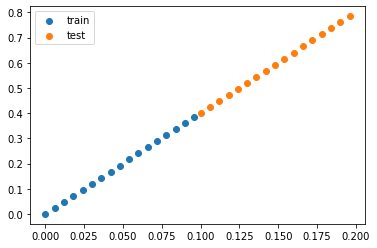

In [14]:
plot_each = 15

plt.scatter(X_train[::plot_each, 0], y_train[::plot_each], label='train')
plt.scatter(X_test[::plot_each, 0], y_test[::plot_each], label='test')
plt.legend();

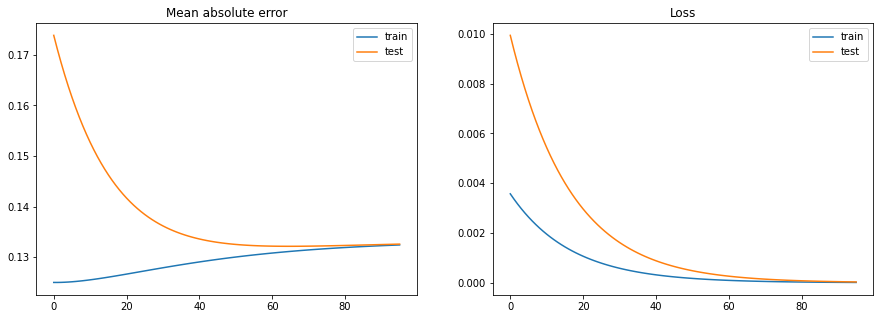

In [15]:
# define neural net
model = NN(MSELoss())

# add some layers
model.add_layer(LinearLayer(4, 1))

model = train(model, X_train, y_train, minibatch_size=10, epoch=100,
           learning_rate=0.01, X_val=X_test, y_val=y_test, verbose=True)

Если все получилось (лосс падает, ошибка падает), то микро-ура  
Теперь самое время начать работать с реальными данными

# Задача 5. Обучить нейросеть на реальных данных

In [16]:
import pandas as pd


DATA_URL = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(DATA_URL)

Постановки задачи следующая -- необходимо предсказать размер страховки для человека на основании собранных данных:
- возраст (age)
- пол (sex)
- индекс массы тела (bmi)
- количество детей (children)
- курильщик или нет (smoker)
- регион человека (region)  
----
Целевая переменная представлена в столбце `charges`

Смотрим на данные глазами

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Закодируем категориальные признаки через One Hot Encoding  
![](https://i.imgur.com/mtimFxh.png)  
Из каждого уникального значения категориального признака создается новый столбец с его значением  
Например, для признака `sex` есть два уникальных значения `{"female", "male"}`  
Мы создадим два новых столбца с названиями `sex_female` и `sex_male`, где будут представлены только 0 или 1, в зависимости от того, какого пола человек в выборке  
В библиотеке pandas это можно сделать через метод `pd.get_dummies()`

In [18]:
cat_columns = ['sex', 'smoker', 'region']
dummy_data = pd.get_dummies(data[cat_columns])
data.drop(cat_columns, axis=1, inplace=True)
data = pd.concat([data, dummy_data], axis=1)

In [19]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Посмотрим на распределение целевой переменной

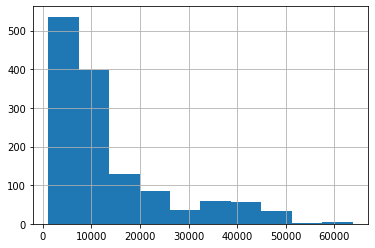

In [20]:
data['charges'].hist();

Есть очень большие значения целевой переменной, которые будут вызывать большой градиент  
Поэтому давайте будем предсказывать не прямое значение, а логарифм

In [21]:
data['charges_log'] = np.log(data['charges'])

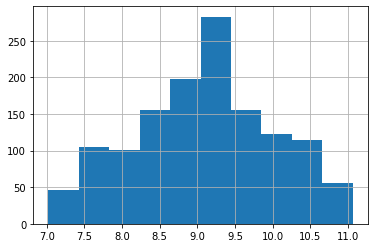

In [22]:
data['charges_log'].hist();

Удалим целевую переременную в сыром виде

In [23]:
data.drop(['charges'], axis=1, inplace=True)

Нейросети плохо работают с числовыми признаками в сыром виде, поэтому хорошо будет их отшаклировать тоже

In [24]:
def standart_scale_feature(feature_array):
    mean = np.mean(feature_array)
    std = np.std(feature_array)
    output = (feature_array - mean) / std
    return output

In [25]:
num_features = ["age", "bmi", "children"]
for feature in num_features:
    data[feature] = standart_scale_feature(data[feature])

In [26]:
data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges_log
0,-1.438764,-0.453320,-0.908614,1,0,0,1,0,0,0,1,9.734176
1,-1.509965,0.509621,-0.078767,0,1,1,0,0,0,1,0,7.453302
2,-0.797954,0.383307,1.580926,0,1,1,0,0,0,1,0,8.400538
3,-0.441948,-1.305531,-0.908614,0,1,1,0,0,1,0,0,9.998092
4,-0.513149,-0.292556,-0.908614,0,1,1,0,0,1,0,0,8.260197


Теперь формируем обучающую и тестовую выборки

In [27]:
y_name = 'charges_log'
X = data.drop([y_name], axis=1).to_numpy()
y = data[y_name].to_numpy().reshape(-1, 1)

In [28]:
print("X:")
print(X[:5])
print("y:")
print(y[:5])

X:
[[-1.43876426 -0.45332    -0.90861367  1.          0.          0.
   1.          0.          0.          0.          1.        ]
 [-1.50996545  0.5096211  -0.07876719  0.          1.          1.
   0.          0.          0.          1.          0.        ]
 [-0.79795355  0.38330685  1.58092576  0.          1.          1.
   0.          0.          0.          1.          0.        ]
 [-0.4419476  -1.30553108 -0.90861367  0.          1.          1.
   0.          0.          1.          0.          0.        ]
 [-0.51314879 -0.29255641 -0.90861367  0.          1.          1.
   0.          0.          1.          0.          0.        ]]
y:
[[9.73417643]
 [7.45330245]
 [8.40053847]
 [9.9980916 ]
 [8.26019685]]


In [29]:
print(X.shape)

(1338, 11)


Возьмем первые 1000 наблюдений для обучения модели, а оставшиеся для теста

In [42]:
split_idx = 1000
X_train = X[:split_idx]
y_train = y[:split_idx]
X_test = X[split_idx:]
y_test = y[split_idx:]

Теперь ваша задача натренировать нейросеть так, чтобы она научилась предсказывать размер страховки для конкретного человека

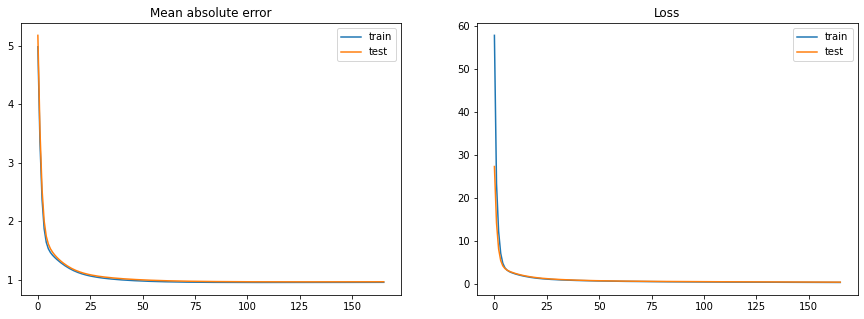

In [43]:
LEARNING_RATE = 1e-3  # с этим параметром придется поиграться
N_EPOCHS = 170 # c этим тоже
SHAPES = [(11, 22), (22, 11), (11, 1)]
ACTIVATIONS = [TanhLayer, TanhLayer, None]

# инициализируем нейросеть
model = NN(MSELoss(), X_train, y_train, X_test, y_test)
model.add_layers(SHAPES, ACTIVATIONS, [LinearLayer] * len(SHAPES))

model = train(model, X_train, y_train, minibatch_size=128, epoch=N_EPOCHS,
           learning_rate=LEARNING_RATE, X_val=X_test, y_val=y_test, verbose=True)

Оценим работу модели

In [44]:
model.calculate_metrics()

У меня получилась средняя ошибка на трейне **0.766**, на тесте **0.835**  
**Эти значения надо побить** (ваши значения должны быть меньше моих)

In [45]:
model.print_mae()

Средняя абсолютная ошибка на трейне: 0.496
Средняя абсолютная ошибка на тесте: 0.559


Выше мы оценивали логарифмы, давайте оценим истинные значения

У меня получилась средняя ошибка на трейне **8090.09**, на тесте **9007.43**  
**Эти значения тоже надо побить** (ваши значения должны быть меньше моих)

In [46]:
model.print_me()

Средняя ошибка на трейне: 6104.41
Средняя ошибка на тесте: 6872.05


Оценим среднюю абсолютную процентную ошибку (метрика называется MAPE)

У меня получилось MAPE на трейне **95.11%**, на тесте **89.10%**  
**Эти значения надо побить** (ваши значения должны быть меньше моих)

In [47]:
model.print_mape()

MAPE train: 51.94%
MAPE test: 54.50%


## Если все получилось, то я вас поздравляю :)

![](http://sun9-16.userapi.com/impf/c840737/v840737590/55ded/Ns6wztlxubY.jpg?size=604x466&quality=96&sign=e4647d7e87db4c211d138163f60ea33b&type=album)  
плюс за то, что завершил(а) эту лабу

P.S. ниже есть _необязательная_ задача для жаждущих еще поупражняться

# Задача 6\*. Попробуйте сделать настоящий линейный слой
То есть добавить еще и вектор смещений B, и написать соответствующий функционал в `forward` и `backward` методах  
Далее собрать из нейросеть при помощи полноценных линейных слоев и посмотреть, улучшится ли качество при таком подходе

In [48]:
class ComplicatedLinearLayer:
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size)
        self.B = np.zeros((1, out_size))
        self.params = [self.W, self.B]
        self.gradB = None
        self.gradW = None
        self.gradInput = None
        
    def forward(self, X):
        self.X = X.copy()
        output = X.dot(self.W) + self.B
        return output
    
    def backward(self, dout):
        self.gradInput = dout.dot(self.W.T)
        self.gradW = self.X.T.dot(dout)
        self.gradB = np.sum(dout, axis = 0)
        return self.gradInput, [self.gradW, self.gradB]

In [49]:
сomplicated_model = NN(MSELoss(), X_train, y_train, X_test, y_test)
сomplicated_model.add_layers(SHAPES, ACTIVATIONS, [ComplicatedLinearLayer] * len(SHAPES))

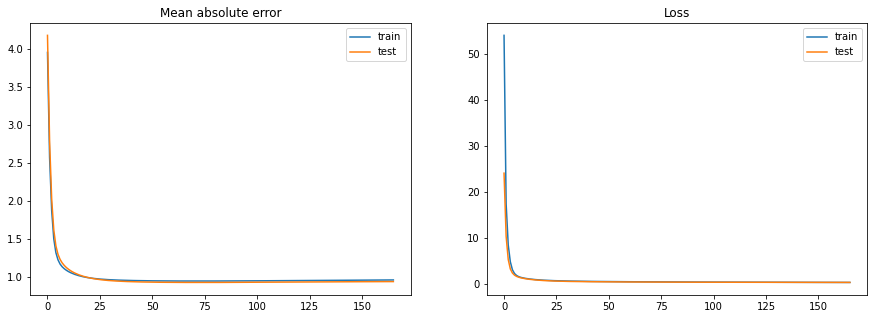

In [50]:
сomplicated_model = train(сomplicated_model, X_train, y_train, minibatch_size=128, epoch=N_EPOCHS,
           learning_rate=LEARNING_RATE, X_val=X_test, y_val=y_test, verbose=True)

In [51]:
сomplicated_model.calculate_metrics()

In [52]:
сomplicated_model.print_metrics()

Средняя абсолютная ошибка на трейне: 0.458
Средняя абсолютная ошибка на тесте: 0.492

Средняя ошибка на трейне: 5919.78
Средняя ошибка на тесте: 6469.33

MAPE train: 47.98%
MAPE test: 47.32%


Вернемся к прошлым значениям:

In [53]:
model.print_metrics()

Средняя абсолютная ошибка на трейне: 0.496
Средняя абсолютная ошибка на тесте: 0.559

Средняя ошибка на трейне: 6104.41
Средняя ошибка на тесте: 6872.05

MAPE train: 51.94%
MAPE test: 54.50%


**Вывод:** модель, имеющая векторы смещений, выигрывает по всем метрикам